<a href="https://colab.research.google.com/github/dourivaljunior/projetos-de-casos-reais/blob/main/Time_Series_with_KATS_PyLy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kats (Kits to Analyze Time Series)
!pip install kats

In [158]:
#Neste estudo específico iremos fazer uma previsão de vendas para a agência de veículos Ponto Veículos com sede em Salvador-BA.
#A previsão a ser realizada é para os meses de julho até dezembro de 2022.
#Os dados fornecidos pela empresa foram:
#ano do veículo, marca, modelo, valor de compra, valor de venda, imposto pago, nome do vendedor, data de compra, data de venda, dente outros.
#A partir da análise dos dados fornecidos precisamos fornecer ao Dono da Empresa Ponto Veículos informações/previsões completas sobre o 
#seu negócio.
#Aqui, neste notebook, iremos analisar somente a previsão da quantidade de veículos que serão vendidos pela empresa mês a mês de julho até dezembro.
#Os outros estudos como previsão de investimento a ser feito pela empresa em compra de veículos, relação compra/venda de veículos,
# qual veículo (modelo e marca) tem melhor (pior) resultado em venda, qual veículo fica mais tempo no pátio da empresa, etc. 
#serão feitos em outros notebooks
#completando assim, o estudo do negócio contratado pela empresa.

In [144]:
from google.colab import files 
uploaded = files.upload()

Saving dados_bd_pto_veic_2018_2022.csv to dados_bd_pto_veic_2018_2022.csv


In [145]:
import pandas as pd
import numpy as np
df = pd.read_csv("dados_bd_pto_veic_2018_2022.csv")
df.columns = ["time", "value"]
df.head()

,time,value
0,2018-02,22
1,2018-03,20
2,2018-04,24
3,2018-05,22
4,2018-06,24


In [169]:
#A análise de venda da quantidade de veículos é feita por mês.

In [146]:
df['time'] =pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    53 non-null     datetime64[ns]
 1   value   53 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 976.0 bytes


In [147]:
len(df) 

53

In [148]:
from kats.consts import TimeSeriesData
df = TimeSeriesData(df)
print(type(df))

<class 'kats.consts.TimeSeriesData'>


In [149]:
df_from_series = TimeSeriesData(time=df.time, value=df.value)

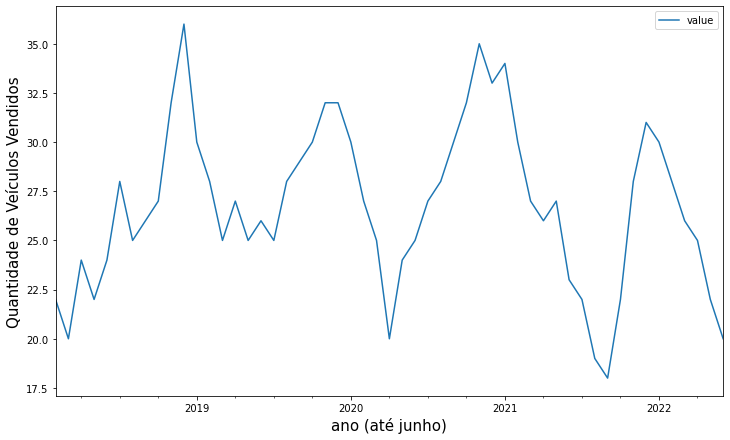

In [161]:
df.plot(cols=['value'])
plt.xlabel('ano (até junho)', fontsize=15)
plt.ylabel('Quantidade de Veículos Vendidos', fontsize=15)
plt.legend()
plt.show()

In [162]:
from kats.models.prophet import ProphetModel
from kats.models.prophet import ProphetParams

In [163]:
params = ProphetParams(seasonality_mode='multiplicative')  #additive
m = ProphetModel(df, params)
m.fit()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [171]:
forecast = m.predict(steps=7, freq="MS")
forecast.head(7)

,time,fcst,fcst_lower,fcst_upper
0,2022-07-01,24.490416,20.906988,27.743787
1,2022-08-01,24.349606,20.900777,27.604019
2,2022-09-01,25.142538,21.675560,28.392292
3,2022-10-01,26.895078,23.606858,30.146291
4,2022-11-01,30.650134,27.282497,33.932969
5,2022-12-01,32.230975,28.757065,35.824894
6,2023-01-01,29.599072,26.237298,32.625684


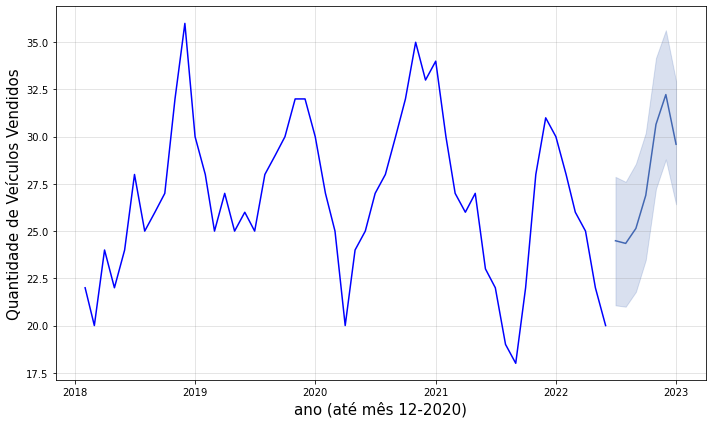

In [167]:
import matplotlib.pyplot as plt
m.plot(cols=['value'])
x=df.time 
y=df.value
plt.plot(x,y, color = 'b')
plt.xlabel('ano (até mês 12-2020)', fontsize=15)
plt.ylabel('Quantidade de Veículos Vendidos', fontsize=15)
plt.show()

In [170]:
#Observamos que há uma tendência crescente na quantidade de veículos a serem vendidos pela empresa
#nos 6 meses seguintes (julho a dezembro) o que é excelente para que a empresa faça investimento na compra de mais veículos.
#Um estudo urgente tem que ser feito para idenntificar quais os melhores veículos para serem commprados.